# DS4200 Project Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

In [2]:
nbashots_df = pd.read_csv('NBA_2024_Shots.csv')

celtics_df = pd.read_csv('celtics_2024_shots.csv')

print(nbashots_df.shape)
print(celtics_df.info())

celtics_df

(218701, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396 entries, 0 to 7395
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEASON_1        7396 non-null   int64  
 1   SEASON_2        7396 non-null   object 
 2   TEAM_ID         7396 non-null   int64  
 3   TEAM_NAME       7396 non-null   object 
 4   PLAYER_ID       7396 non-null   int64  
 5   PLAYER_NAME     7396 non-null   object 
 6   POSITION_GROUP  7330 non-null   object 
 7   POSITION        7330 non-null   object 
 8   GAME_DATE       7396 non-null   object 
 9   GAME_ID         7396 non-null   int64  
 10  HOME_TEAM       7396 non-null   object 
 11  AWAY_TEAM       7396 non-null   object 
 12  EVENT_TYPE      7396 non-null   object 
 13  SHOT_MADE       7396 non-null   bool   
 14  ACTION_TYPE     7396 non-null   object 
 15  SHOT_TYPE       7396 non-null   object 
 16  BASIC_ZONE      7396 non-null   object 
 17  ZONE_NAME       7396

SEASON_1 SEASON_2     TEAM_ID       TEAM_NAME  PLAYER_ID    PLAYER_NAME  \
0         2024  2023-24  1610612738  Boston Celtics     201950   Jrue Holiday   
1         2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
2         2024  2023-24  1610612738  Boston Celtics    1628369   Jayson Tatum   
3         2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
4         2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
...        ...      ...         ...             ...        ...            ...   
7391      2024  2023-24  1610612738  Boston Celtics     201143     Al Horford   
7392      2024  2023-24  1610612738  Boston Celtics    1628369   Jayson Tatum   
7393      2024  2023-24  1610612738  Boston Celtics     201950   Jrue Holiday   
7394      2024  2023-24  1610612738  Boston Celtics    1628401  Derrick White   
7395      2024  2023-24  1610612738  Boston Celtics    1628369   Jayson Tatum   

     POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0                 G       PG  11-10-2023  22300010  ...   
1                 F       SF  11-10-2023  22300010  ...   
2                 F       PF  11-10-2023  22300010  ...   
3                 F       SF  11-10-2023  22300010  ...   
4                 F       SF  11-10-2023  22300010  ...   
...             ...      ...         ...       ...  ...   
7391              C        C  12-08-2023  22301227  ...   
7392              F       PF  12-08-2023  22301227  ...   
7393              G       PG  12-08-2023  22301227  ...   
7394              G       SG  12-08-2023  22301227  ...   
7395              F       PF  12-08-2023  22301227  ...   

                 BASIC_ZONE          ZONE_NAME ZONE_ABB       ZONE_RANGE  \
0     In The Paint (Non-RA)             Center        C  Less Than 8 ft.   
1           Restricted Area             Center        C  Less Than 8 ft.   
2         Above the Break 3  Right Side Center       RC          24+ ft.   
3                 Mid-Range   Left Side Center       LC        16-24 ft.   
4         Above the Break 3   Left Side Center       LC          24+ ft.   
...                     ...                ...      ...              ...   
7391      Above the Break 3  Right Side Center       RC          24+ ft.   
7392      Above the Break 3  Right Side Center       RC          24+ ft.   
7393              Mid-Range             Center        C        16-24 ft.   
7394        Restricted Area             Center        C  Less Than 8 ft.   
7395  In The Paint (Non-RA)             Center        C  Less Than 8 ft.   

     LOC_X  LOC_Y SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0     -1.6  12.35             7       1        11        39  
1     -1.2   8.75             3       1        11        13  
2    -13.5  30.05            28       1        10        27  
3     13.4  17.45            18       1        10        22  
4     14.7  27.95            27       1        10         2  
...    ...    ...           ...     ...       ...       ...  
7391 -22.3  19.55            26       4         2        59  
7392 -10.9  30.85            27       4         2        20  
7393  -0.1  23.25            18       4         1        46  
7394   1.4   6.45             1       4         1        10  
7395  -0.7  10.45             5       4         0        57  

[7396 rows x 26 columns]

# Static Plots

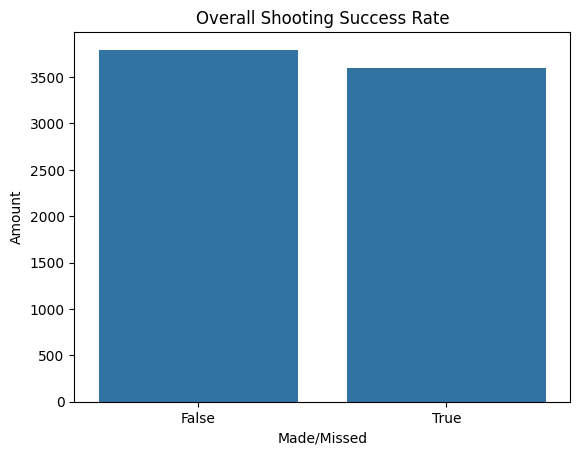

In [3]:
sns.countplot(data=celtics_df, x='SHOT_MADE')

plt.title('Overall Shooting Success Rate')
plt.xlabel('Made/Missed')
plt.ylabel('Amount')
plt.show()

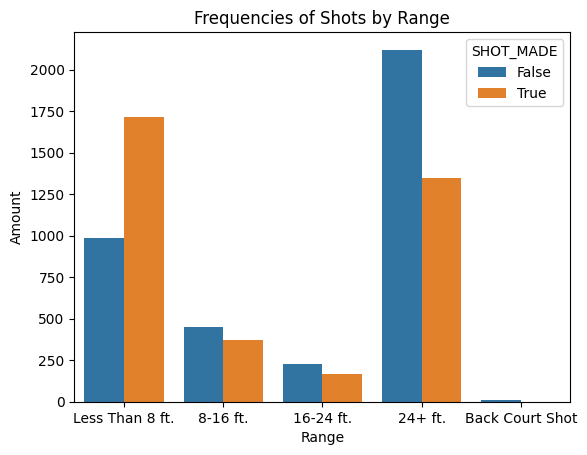

In [4]:
celtics_df['ZONE_RANGE'] = celtics_df['ZONE_RANGE'].astype(pd.CategoricalDtype(categories=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']))

sns.countplot(data=celtics_df, x='ZONE_RANGE', hue='SHOT_MADE')

plt.title('Frequencies of Shots by Range')
plt.xlabel('Range')
plt.ylabel('Amount')
plt.show()

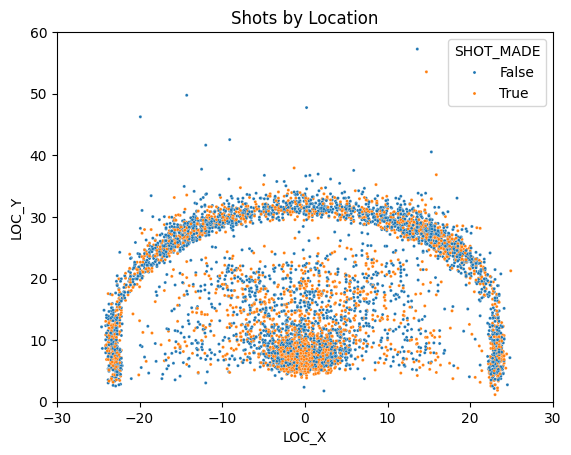

In [5]:
sns.scatterplot(data=celtics_df, x='LOC_X', y='LOC_Y', hue='SHOT_MADE', s=5)

plt.title('Shots by Location')
plt.xlim(-30, 30)
plt.ylim([0, 60])
plt.show()

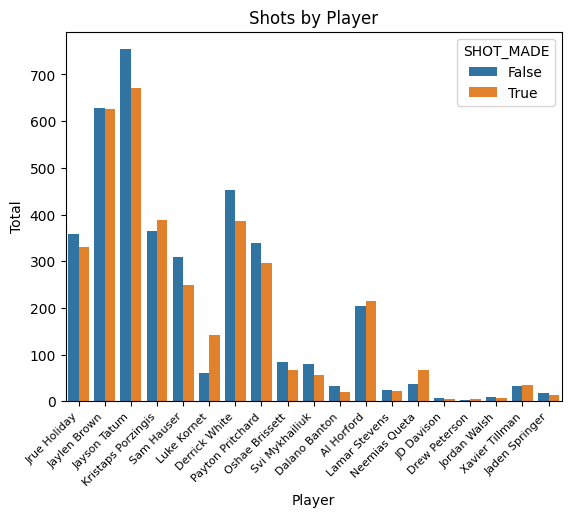

In [6]:
most_shots_list = celtics_df['PLAYER_NAME'].value_counts()
most_shots_df = celtics_df[celtics_df['PLAYER_NAME'].isin(most_shots_list.index.values)]

sns.countplot(data=most_shots_df, x='PLAYER_NAME', hue='SHOT_MADE')
plt.title('Shots by Player')
plt.xlabel('Player')
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.ylabel('Total')
plt.show()

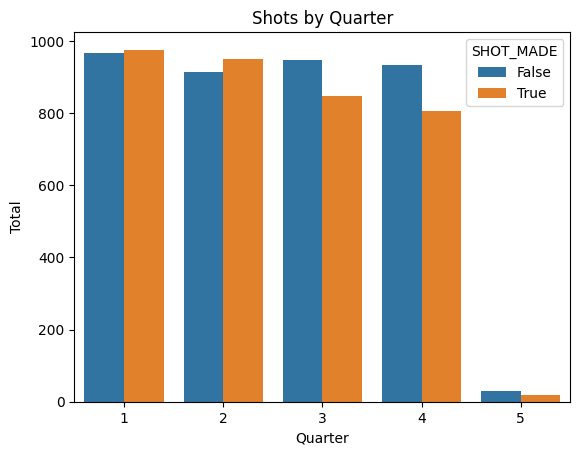

In [7]:
sns.countplot(data=celtics_df, x='QUARTER', hue='SHOT_MADE')

plt.title('Shots by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total')
plt.show()

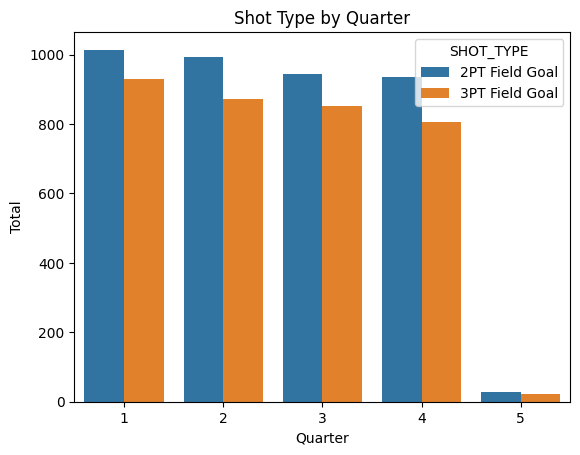

In [8]:
sns.countplot(data=celtics_df, x='QUARTER', hue='SHOT_TYPE')

plt.title('Shot Type by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total')
plt.show()

In [9]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Interactive Plot 1 - Shot Chart

In [10]:
# Filter data to 10 players with most shots
players_most_shots = celtics_df['PLAYER_NAME'].value_counts().head(10)
most_shots_df = celtics_df[celtics_df['PLAYER_NAME'].isin(players_most_shots.index)]

# Add total time left column
# Normal 4 quarter time left
non_overtime = celtics_df[celtics_df['QUARTER'] < 5]
non_overtime.loc[:, 'TOTAL_TIME_LEFT'] = (4 - non_overtime['QUARTER'])*720 + non_overtime['MINS_LEFT']*60 + non_overtime['SECS_LEFT']
# Overtime quarter time left
overtime = celtics_df[celtics_df['QUARTER'] > 4]
overtime.loc[:, 'TOTAL_TIME_LEFT'] = overtime['MINS_LEFT']*60 + overtime['SECS_LEFT']
# Combine overtime, non-overtime
celtics_df = pd.concat([non_overtime, overtime])
# Total time left as readable tooltip
celtics_df['TOTAL_TIME_LEFT_TOOLTIP'] = 'Q' + celtics_df['QUARTER'].astype(str) + ', ' + celtics_df['MINS_LEFT'].astype(str) + ' min, ' + celtics_df['SECS_LEFT'].astype(str) + ' sec'
celtics_df


C:\Users\andyr\AppData\Local\Temp\ipykernel_214188\1807599843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_overtime.loc[:, 'TOTAL_TIME_LEFT'] = (4 - non_overtime['QUARTER'])*720 + non_overtime['MINS_LEFT']*60 + non_overtime['SECS_LEFT']
C:\Users\andyr\AppData\Local\Temp\ipykernel_214188\1807599843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overtime.loc[:, 'TOTAL_TIME_LEFT'] = overtime['MINS_LEFT']*60 + overtime['SECS_LEFT']


SEASON_1 SEASON_2     TEAM_ID       TEAM_NAME  PLAYER_ID    PLAYER_NAME  \
0         2024  2023-24  1610612738  Boston Celtics     201950   Jrue Holiday   
1         2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
2         2024  2023-24  1610612738  Boston Celtics    1628369   Jayson Tatum   
3         2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
4         2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
...        ...      ...         ...             ...        ...            ...   
6392      2024  2023-24  1610612738  Boston Celtics    1628369   Jayson Tatum   
6393      2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
6394      2024  2023-24  1610612738  Boston Celtics    1628401  Derrick White   
6395      2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   
6396      2024  2023-24  1610612738  Boston Celtics    1627759   Jaylen Brown   

     POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ... ZONE_ABB  \
0                 G       PG  11-10-2023  22300010  ...        C   
1                 F       SF  11-10-2023  22300010  ...        C   
2                 F       PF  11-10-2023  22300010  ...       RC   
3                 F       SF  11-10-2023  22300010  ...       LC   
4                 F       SF  11-10-2023  22300010  ...       LC   
...             ...      ...         ...       ...  ...      ...   
6392              F       PF  03-28-2024  22301060  ...        C   
6393              F       SF  03-28-2024  22301060  ...       LC   
6394              G       SG  03-28-2024  22301060  ...       LC   
6395              F       SF  03-28-2024  22301060  ...        C   
6396              F       SF  03-28-2024  22301060  ...       RC   

           ZONE_RANGE LOC_X  LOC_Y SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  \
0     Less Than 8 ft.  -1.6  12.35             7       1        11        39   
1     Less Than 8 ft.  -1.2   8.75             3       1        11        13   
2             24+ ft. -13.5  30.05            28       1        10        27   
3           16-24 ft.  13.4  17.45            18       1        10        22   
4             24+ ft.  14.7  27.95            27       1        10         2   
...               ...   ...    ...           ...     ...       ...       ...   
6392  Less Than 8 ft.   0.4   6.55             1       5         3        44   
6393          24+ ft.  12.0  27.85            25       5         2        56   
6394          24+ ft.  14.2  27.25            26       5         2        21   
6395          24+ ft.  -6.4  30.85            26       5         1         4   
6396        16-24 ft.  -7.6  20.65            17       5         0         6   

     TOTAL_TIME_LEFT TOTAL_TIME_LEFT_TOOLTIP  
0               2859      Q1, 11 min, 39 sec  
1               2833      Q1, 11 min, 13 sec  
2               2787      Q1, 10 min, 27 sec  
3               2782      Q1, 10 min, 22 sec  
4               2762       Q1, 10 min, 2 sec  
...              ...                     ...  
6392             224       Q5, 3 min, 44 sec  
6393             176       Q5, 2 min, 56 sec  
6394             141       Q5, 2 min, 21 sec  
6395              64        Q5, 1 min, 4 sec  
6396               6        Q5, 0 min, 6 sec  

[7396 rows x 28 columns]

In [11]:
# Player selection
player_dropdown = alt.binding_select(options=most_shots_df['PLAYER_NAME'].unique(), name='Player Name ')
player_selection = alt.selection_point(fields=['PLAYER_NAME'], bind=player_dropdown)

# Color for shot made/missed
made_missed_condition = alt.condition(alt.datum.SHOT_MADE, alt.value('blue'), alt.value('red'))

# Shot made/missed radio selection
made_missed_radio = alt.binding_radio(options=[True, False, None], labels=['Made', 'Missed', 'Both'], name='Shot Made')
made_missed_selection = alt.selection_point(fields=['SHOT_MADE'], bind=made_missed_radio)

# Radio button for quarter
quarter_radio = alt.binding_radio(name='Quarter: ', options=np.append(celtics_df['QUARTER'].unique(), None), labels=['First', 'Second', 'Third', 'Fourth', 'Overtime', 'All'])
quarter_selection = alt.selection_point(fields=['QUARTER'], bind=quarter_radio)
# Condition for quarter
quarter_condition = alt.condition(quarter_selection, alt.value(.7), alt.value(0))

# Interactive scatterplot of shot locations
shot_chart = alt.Chart(celtics_df).mark_point().encode(
    alt.X('LOC_X:Q', title='Horizontal Distance from Basket (ft.)').scale(domain=(-25,25)),
    alt.Y('LOC_Y:Q', title='Vertical Distance from Basket (ft.)').scale(domain=(0,90)),
    color=made_missed_condition,
    opacity=quarter_condition,
    tooltip=[alt.Tooltip('PLAYER_NAME', title='Player'), alt.Tooltip('TOTAL_TIME_LEFT_TOOLTIP', title='Time Left')]
).add_params(
    player_selection,
    made_missed_selection,
    quarter_selection
).transform_filter(
    player_selection,
    made_missed_selection,
    quarter_selection
)

shot_chart.properties(title='Shot Chart of 10 Players with Most Shots')

alt.Chart(...)

# Interactive Plot 2 - Total Points by Shot Type

In [12]:
# Convert column type to date
celtics_df['GAME_DATE'] = celtics_df['GAME_DATE'].astype('datetime64[s]')
# Add a points multiplier column for plotting points/game
celtics_df['POINTS'] = np.where(celtics_df['SHOT_TYPE'] == '2PT Field Goal', 2, 3)

# Date slider
date_selection = alt.selection_interval(encodings=['x'])

# Base chart
shot_type_chart = alt.Chart(celtics_df[celtics_df['SHOT_MADE']]).mark_line(point=True).encode(
    alt.X('GAME_DATE:T', title='Date'),
    alt.Y('sum(POINTS):Q', title='Total Points'),
    tooltip=[alt.Tooltip('GAME_DATE:T', format='%m-%d-%Y'), 'SHOT_TYPE:N', alt.Tooltip('sum(POINTS):Q')],
    color='SHOT_TYPE:N'
)
# Upper chart using lower chart as date slider
upper = shot_type_chart.encode(alt.X('GAME_DATE:T', title='Date').scale(domain=date_selection)).properties(title='Total Points Per Game by Shot Type')
lower = shot_type_chart.properties(height=60).add_params(date_selection)

upper & lower

alt.VConcatChart(...)